In [1]:
import pandas as pd

# Importing Datasets

In [2]:
df=pd.read_csv(r'C:\Users\joe\Downloads\file (1).csv')

In [3]:
df.head()

,userId,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df.shape

(100003, 4)

In [5]:
#time stamp column wont be needed so we will drop it 
df.drop('timestamp',1)

,userId,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


# Importing dataset containing movie names

In [6]:
movie_title=pd.read_csv(r'C:\Users\joe\Downloads\Movie_Id_Titles.csv')
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merging df and movie_title

In [8]:
data=pd.merge(df,movie_title,on='item_id')
data.head()

,userId,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Finding the mean rating of movies

In [10]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

# Finding the count rating of movies

In [11]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

# Creating dataframe with Rating values 

In [12]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


# Adding the Number of ratings column to the dataframe

In [14]:
ratings['num of ratings']=pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


# Visualization of data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:>

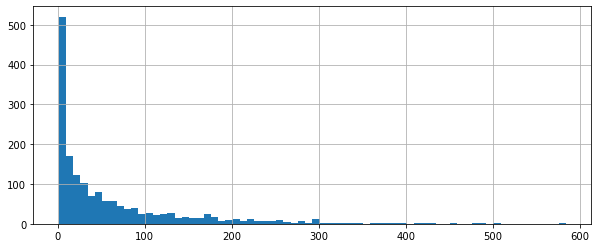

In [16]:
#plotting graph of no of ratings
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

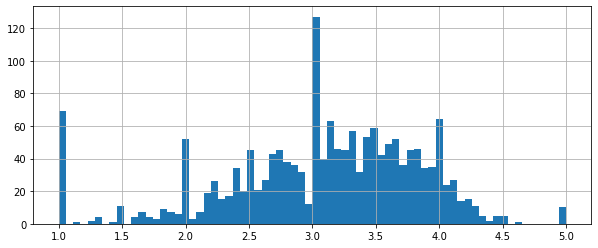

In [17]:
#plotting graph of ratings
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

# Recommendation System

## Creating Matrix where one axis has user id and movie titles on other axis

In [32]:
#creating spreadsheet style pivot table
movie_mat=data.pivot_table(index='userId',columns='title',values='rating')
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#here there are lots of NaN as most people hav ent watched all the movies

# Sorting the Values according the no of ratings

In [19]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


# Choosing 2 movies :Star_wars:scifi ,Liar_liar :Comedy

In [22]:
#finding the rating of those 2 movies 
starwars_user_ratings=movie_mat['Star Wars (1977)']
liarliar_user_ratings=movie_mat['Liar Liar (1997)']

starwars_user_ratings.head()

userId
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

# Analysing Corelation with similar movies 

In [24]:
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)
similar_to_liarliar = movie_mat.corrwith(liarliar_user_ratings)

C:\Users\joe\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\joe\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


# Cleaning the data of NaN values and using dataframe instead of series

In [25]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


# Now sorting the dataframe By correlation

In [26]:
#similar movies like star wars
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
#some movies have very few reviews which cause the avearge to be increased and causeing problem in the dataset 
#so we will be filtering the movies with less than 100 reviews

In [27]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


# Now sorting the Values 

In [29]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


# Similarly appling it to the movie Liar Liar

In [30]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace= True)

corr_liarliar=corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
